331
[ 4.34703147e+05  1.78907252e-02  2.28909992e+04 -1.99427168e+01] [ 4.49901532e+05  1.76663163e-02  2.43997347e+04 -1.48954702e+01]
[25398.066083757287] [23706.49722759024]
[25380.584122141387] [23692.037113908496]
[25363.408290334763] [23677.833401703752]
[25346.533227642652] [23663.881544558266]
[25329.953667242386] [23650.17707666972]
[25313.664434539587] [23636.71561142178]
[25297.660445553152] [23623.492839979997]
[25281.936705328477] [23610.504529912607]
[25266.488306378535] [23597.746523835787]
[25251.310427152184] [23585.214738082934]
[25236.398330529344] [23572.905161397535]
[25221.747362342507] [23560.813853649215]
[25207.352949924145] [23548.936944572564]
[25193.21060067953] [23537.270632528307]
[25179.31590068459] [23525.811183286452]
[25165.664513308267] [23514.55492883102]
[25152.252177859053] [23503.49826618596]
[25139.07470825517] [23492.63765626187]
[25126.127991718095] [23481.969622723205]
[25113.407987488896] [23471.490750875535]
[25100.910725567126] [23461.19768

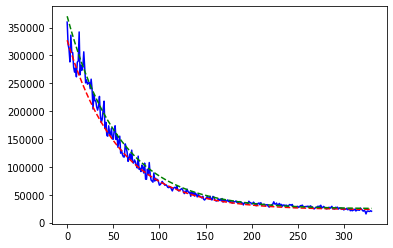

In [6]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))
start=28
data=data[start:]
length=len(data)
print(length)
ydata = data
xdata = [ i for i in range(length)]
local_max_x=[]
local_max_y=[]
local_min_x=[]
local_min_y=[]
for i in range(length-1):
    if(i==0):
        if(data[i]>data[i+1]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])
    else:
        if(data[i]>data[i+1] and data[i]>data[i-1]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1] and data[i]<data[i-1]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])                

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
 
def func(x, a, b, c,d):
    return a * np.exp(-(x-d)*b) + c

local_min_x=np.array(local_min_x)
local_min_y=np.array(local_min_y)
local_max_x=np.array(local_max_x)
local_max_y=np.array(local_max_y)
plt.plot(xdata,ydata,'b-')
popt_min, pcov_min = curve_fit(func, local_min_x, local_min_y,bounds = ([0,1e-4,1e+04,-150],[1e6,1,4e+04,150]))
#popt数组中，三个值分别是待求参数a,b,c
y_min = [func(i, popt_min[0],popt_min[1],popt_min[2],popt_min[3]) for i in xdata]
plt.plot(xdata,y_min,'r--')
popt_max, pcov_max = curve_fit(func, local_max_x, local_max_y,maxfev=10000,bounds = ([0,1e-4,1e+04,-150],[1e6,1,4e+04,150]))
#popt数组中，三个值分别是待求参数a,b,c
y_max = [func(i, popt_max[0],popt_max[1],popt_max[2],popt_max[3]) for i in xdata]
plt.plot(xdata,y_max,'g--')
plt.savefig("regression")
print(popt_min,popt_max)
for k in range(60):
    pre_data=length+k
    y_predict_max=[func(pre_data, popt_max[0],popt_max[1],popt_max[2],popt_max[3])]
    y_predict_min=[func(pre_data, popt_min[0],popt_min[1],popt_min[2],popt_min[3])]
    print(y_predict_max,y_predict_min)

In [2]:
plot_data=[]
for i in range(len(data)):
    plot_data.append([i,data[i]])
print(plot_data)

[[0, 74458], [1, 72518], [2, 88932], [3, 74412], [4, 79446], [5, 75673], [6, 77585], [7, 73225], [8, 67115], [9, 68349], [10, 70722], [11, 73933], [12, 70920], [13, 69884], [14, 66814], [15, 67909], [16, 66431], [17, 63380], [18, 62723], [19, 63188], [20, 63846], [21, 60069], [22, 56839], [23, 60969], [24, 62768], [25, 63241], [26, 61278], [27, 65431], [28, 58263], [29, 56738], [30, 58478], [31, 58991], [32, 61026], [33, 60020], [34, 55376], [35, 51958], [36, 56684], [37, 53802], [38, 59968], [39, 55989], [40, 53430], [41, 54665], [42, 47205], [43, 55359], [44, 50484], [45, 53342], [46, 47645], [47, 53111], [48, 50617], [49, 46089], [50, 50450], [51, 47986], [52, 47312], [53, 45645], [54, 44212], [55, 47248], [56, 41765], [57, 40486], [58, 42645], [59, 44578], [60, 47344], [61, 43407], [62, 42806], [63, 47094], [64, 41785], [65, 40545], [66, 46910], [67, 46246], [68, 40549], [69, 39234], [70, 38769], [71, 39611], [72, 42574], [73, 39667], [74, 42237], [75, 39086], [76, 43099], [77, 367

334
[-2.80558160e-02  1.89980125e+01 -4.21355528e+03  3.39050759e+05]
332
6617.361161894805


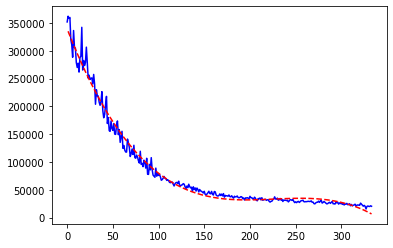

In [39]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))
start=25
data=data[start:]
length=len(data)
print(length)
ydata = data
xdata = [ i for i in range(length)]
mean_x=[]
mean_y=[]
for i in range(length-1):
    if(i!=0):
        mean_x.append(xdata[i])
        mean_y.append((ydata[i]+ydata[i+1]+ydata[i-1])/3)


from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
 
def func(x, a, b, c, d):
    return a * x**3 +b*x**2+c *x+d

# local_min_x=np.array(local_min_x)
# local_min_y=np.array(local_min_y)
# local_max_x=np.array(local_max_x)
# local_max_y=np.array(local_max_y)
import uncertainties as unc
import uncertainties.unumpy as unp
plt.plot(xdata,ydata,'b-')
popt_mean, pcov_mean = curve_fit(func, mean_x[1:], mean_y[1:])
#popt数组中，三个值分别是待求参数a,b,c
# a, b, c ,d= unc.correlated_values(popt_mean, pcov_mean)
y_mean= [func(i, popt_mean[0],popt_mean[1],popt_mean[2],popt_mean[3]) for i in xdata[1:]]
plt.plot(xdata[1:],y_mean,'r--')
nom = unp.nominal_values(y_mean)
std = unp.std_devs(y_mean)
print(popt_mean)
print(mean_x[-1])
y_predict_mean=[]
for k in range(1,len(ydata)):
    data_to_pred=k
    y_predict_mean.append(func(data_to_pred, popt_mean[0],popt_mean[1],popt_mean[2],popt_mean[3]))

print(y_predict_mean[-1])

In [40]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
#调用
acc=0
total=0
y_pred=[]
y_test=ydata[1:]
x_test=xdata[1:]
for i in range(len(y_test)):
    if(y_test[i]>y_predict_mean[i]-1000 and y_test[i]<y_predict_mean[i]+1000):
        acc+=1
    total+=1
    y_pred.append((y_predict_mean[i]+y_predict_mean[i])/2)
print(acc/total)

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.09009009009009009
98236237.51602651
6904.677822044624
0.9848534250925316


[ 4.42203941e+05  1.70087621e-02  2.24766593e+04 -1.73839911e+01] [ 4.48812459e+05  1.79264491e-02  2.39280441e+04 -1.51627907e+01]
[24226.150620661683] [22887.992199711356]


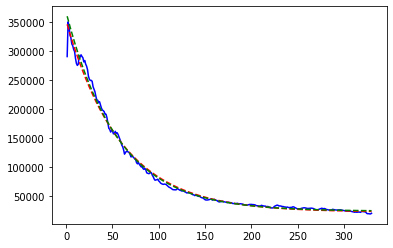

In [5]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))
start=25
data=data[start:]
length=len(data)
#print(length)
ydata = data
xdata = [ i for i in range(length)]
mean_x=[]
mean_y=[]
for i in range(length-3):
    if(i!=0):
        mean_x.append(xdata[i])
        mean_y.append((ydata[i]+ydata[i+1]+ydata[i-1]+ydata[i+2]+ydata[i-2])/5)

ydata = mean_y
xdata = mean_x
length=len(xdata)
local_max_x=[]
local_max_y=[]
local_min_x=[]
local_min_y=[]
for i in range(length-1):
    if(i==0):
        if(data[i]>data[i+1]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])
    else:
        if(data[i]>data[i+1] and data[i]>data[i-1]):
            local_max_x.append(xdata[i])
            local_max_y.append(ydata[i])
        if(data[i]<data[i+1] and data[i]<data[i-1]):
            local_min_x.append(xdata[i])
            local_min_y.append(ydata[i])                
        

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
 
def func(x, a, b, c,d):
    return a * np.exp(-(x-d)*b) + c

local_min_x=np.array(local_min_x)
local_min_y=np.array(local_min_y)
local_max_x=np.array(local_max_x)
local_max_y=np.array(local_max_y)
plt.plot(xdata,ydata,'b-')
popt_min, pcov_min = curve_fit(func, local_min_x, local_min_y,bounds = ([0,1e-4,1e+04,-150],[1e6,1,4e+04,150]))
#popt数组中，三个值分别是待求参数a,b,c
y_min = [func(i, popt_min[0],popt_min[1],popt_min[2],popt_min[3]) for i in xdata]
plt.plot(xdata,y_min,'r--')
popt_max, pcov_max = curve_fit(func, local_max_x, local_max_y,maxfev=10000,bounds = ([0,1e-4,1e+04,-150],[1e6,1,4e+04,150]))
#popt数组中，三个值分别是待求参数a,b,c
y_max = [func(i, popt_max[0],popt_max[1],popt_max[2],popt_max[3]) for i in xdata]
plt.plot(xdata,y_max,'g--')
plt.savefig("regression")
print(popt_min,popt_max)
pre_data=418-start
y_predict_max=[func(pre_data, popt_max[0],popt_max[1],popt_max[2],popt_max[3])]
y_predict_min=[func(pre_data, popt_min[0],popt_min[1],popt_min[2],popt_min[3])]
print(y_predict_max,y_predict_min)

334
[ 8.50453446e-05 -8.49752433e-02  3.12930079e+01 -5.14084225e+03
  3.55396726e+05]
[44686.33699609607]


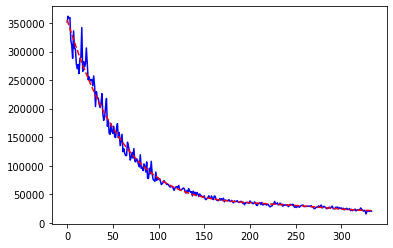

In [14]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))
start=25
data=data[start:]
length=len(data)
print(length)
ydata = data
xdata = [ i for i in range(length)]
mean_x=xdata
mean_y=ydata
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
 
def func(x, a, b, c, d,e):
    return a * x**4 + b*x**3 + c*x**2 + d*x + e

# local_min_x=np.array(local_min_x)
# local_min_y=np.array(local_min_y)
# local_max_x=np.array(local_max_x)
# local_max_y=np.array(local_max_y)
import uncertainties as unc
import uncertainties.unumpy as unp
plt.plot(xdata,ydata,'b-')
popt_mean, pcov_mean = curve_fit(func, mean_x, mean_y)
#popt数组中，三个值分别是待求参数a,b,c
a, b, c ,d, e= unc.correlated_values(popt_mean, pcov_mean)
y_mean= [func(i, popt_mean[0],popt_mean[1],popt_mean[2],popt_mean[3],popt_mean[4]) for i in xdata]
plt.plot(xdata,y_mean,'r--')
nom = unp.nominal_values(y_mean)
std = unp.std_devs(y_mean)
print(popt_mean)
data_to_pred=418-start
y_predict_mean=[func(400, popt_mean[0],popt_mean[1],popt_mean[2],popt_mean[3],popt_mean[4])]

print(y_predict_mean)